In [1]:
# Initial imports
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt

## Part 1: Prepare the Data

In [19]:
#import data
pdreadfile = Path("Resources/myopia.csv")
df = pd.read_csv(pdreadfile)
df.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,MYOPIC
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1,0
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0,0


In [20]:
labels = df['MYOPIC']

In [21]:
df.columns

Index(['AGE', 'SPHEQ', 'AL', 'ACD', 'LT', 'VCD', 'SPORTHR', 'READHR', 'COMPHR',
       'STUDYHR', 'TVHR', 'DIOPTERHR', 'MOMMY', 'DADMY', 'MYOPIC'],
      dtype='object')

In [22]:
# Droping Column Labled "MYOPIC"
df.drop('MYOPIC', axis=1, inplace=True)

In [23]:
df.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0


In [24]:
# using Sklearn to scale the dataframe
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df = scaler.fit_transform(df)

In [25]:
df[0]

array([-0.42021911, -1.3639169 , -0.89286146,  0.48378402, -0.28144315,
       -1.0197916 ,  4.1506609 ,  1.69744958, -0.68931054, -0.67299591,
        0.18405806,  0.49830393,  0.98713773,  1.0032415 ])

In [26]:
#Did it work? lol
df.shape

(618, 14)

In [27]:
# import PCA
from sklearn.decomposition import PCA

# Initialize PCA model
PCA = PCA(n_components=0.90)

# Get two principal components for the data.
pcaData = PCA.fit_transform(df)

# checking for reduced shape
pcaDf = pd.DataFrame(pcaData)
pcaDf.head()

,0,1,2,3,4,5,6,7,8,9
0,0.535503,1.145004,-1.385019,0.116006,-3.226691,-1.928459,-1.958892,-1.922997,0.026753,0.178144
1,-0.624706,-1.575786,-0.794253,1.156287,0.292256,0.349060,-0.455206,0.285332,0.689683,-0.557031
2,-0.933479,-0.717076,0.820150,-1.547638,0.173941,0.272783,0.025821,-0.030817,-0.431499,0.013336
3,0.106354,1.192475,-0.024441,1.507469,-2.356836,-0.023139,0.236418,-1.717109,-1.230785,-0.703400
4,-0.388503,-2.839655,-0.229767,-0.622510,0.271458,-0.928956,0.537900,-1.301787,0.279007,0.631183


In [28]:
pcaDf.shape

(618, 10)

#### How did the number of the features change?  
Since dimensionality reduction is transforming data from high dimensional space to low dimensional space we will see change in how many features the dataset will have after appling the PCA. In this case preserved 90% of the explained variance in dimensionality reduction as seen above. So in this instance we went from 14 features to 10 features.

In [29]:
# import tSNE
from sklearn.manifold import TSNE

# Run tSNE
tsne = TSNE(learning_rate=250)
tsne_features = tsne.fit_transform(pcaDf)

tsne_features.shape

C:\Users\zaner\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


(618, 2)

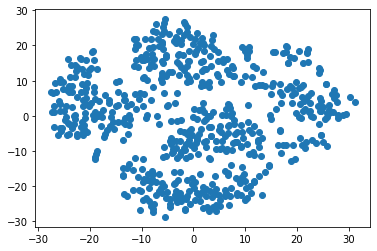

In [30]:
# Plot the results
plt.scatter(tsne_features[:,0], tsne_features[:,1])
plt.show()

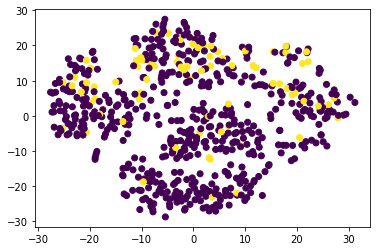

In [31]:
# Results colored by target value
plt.scatter(tsne_features[:,0], tsne_features[:,1], c=labels)
plt.show()

#### Are there distinct clusters?
According to the graph above there are about 5 distinct clusters

## Part 3: Perform a Cluster Analysis with K-means 

In [33]:
# import kmeans
from sklearn.cluster import KMeans

# Identify clusters with k-means
inertia = []
k = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

for value in k:
    kMeans = KMeans(n_clusters = value, random_state=0)
    kMeans.fit(pcaDf)
    inertia.append(kMeans.inertia_)

C:\Users\zaner\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


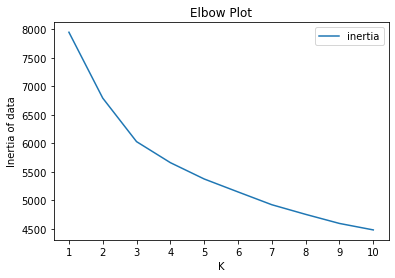

In [38]:
# Create elbow plot
elbowPlot = pd.DataFrame({'K': k, "inertia": inertia})
elbowPlot.plot.line(x='K', y="inertia")
plt.xticks(range(1,11))
plt.xlabel("K")
plt.ylabel("Inertia of data")
plt.title("Elbow Plot")
plt.show()
#you can see the elbow in plot at the "3" marker as thats when you see a big change compared to other numbers on plot 

In [39]:
#Part 4 Darn :( There was no corrilation in data that signifies Patients of a certain type are less likeley to get nearsightedness and myopia. The Clusters are
#to far apart and don't show any specific patterns.